In [1]:
from pathlib import Path
import sys
import os.path
import os
import numpy as np
import pandas as pd
from scipy.stats import f_oneway, gaussian_kde, mannwhitneyu, pearsonr, spearmanr
import seaborn as sns
from tqdm.notebook import tqdm
from pymodulon.compare import compare_ica
from pymodulon.core import IcaData
from pymodulon.io import load_json_model, save_to_json
from pymodulon.plotting import *
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.max_open_warning'] = 100
sns.set_style('whitegrid')

In [2]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [3]:
precise1k = load_json_model('../Data/p1k.json.gz')

In [4]:
M_precise_1k = precise1k.M

In [5]:
A_precise_1k = precise1k.A

In [6]:
log_tpm_precise_1k = precise1k.log_tpm

In [7]:
gene_presence_matrix_precise_1k = pd.read_csv('../Data/p1k/gene_presence_matrix.csv', index_col=0)

In [8]:
gene_presence_matrix_precise_1k.columns = M_precise_1k.columns

In [9]:
iM_table_precise_1k = pd.read_csv('../Data/iM_table.csv')

In [10]:
iM_table_precise_1k['k'] = iM_table_precise_1k['name']

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from adjustText import adjust_text
import matplotlib.font_manager as fm

def plot_scatter_condition_component_with_geneid(df, gene_presence_df, iM_table_df, M_matrix, A_matrix, component, condition2):
    
    condition1 = 'p1k_00001'
    
    # Create the subfolder if it doesn't exist
    directory = f"./A_confidence"
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Prepare x and y
    x = df.loc[gene_presence_df.index, condition1]
    y = df.loc[gene_presence_df.index, condition2]

    # Create a mask for non-zero values
    mask = (x != 0) & (y != 0)

    # Apply the mask
    x = x[mask]
    y = y[mask]

    A_value = A_matrix.loc[component, condition2]
    
    # Define colors and also store coordinates of red and blue points for calculating centroid
    x_red = []
    y_red = []
    x_blue = []
    y_blue = []
    genes_red = []
    genes_blue = []
    for gene in x.index:
        if gene_presence_df.loc[gene, component]:
            M_value = M_matrix.loc[gene, component]
            if np.sign(M_value) == np.sign(A_value):
                x_blue.append(x[gene])
                y_blue.append(y[gene])
                genes_blue.append(gene)
            else:
                x_red.append(x[gene])
                y_red.append(y[gene])
                genes_red.append(gene)

    # Set font properties
    font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
    font_prop = fm.FontProperties(fname=font_path)

    # Create the scatter plot
    plt.figure(figsize=(4, 4))
    plt.scatter(x, y, c='grey', alpha=0.03, s=10)
    plt.scatter(x_blue, y_blue, c='blue', alpha=0.5, s=24)
    plt.scatter(x_red, y_red, c='red', alpha=0.5, s=24)

    # Get component name from iM_table_df
    component_name = iM_table_df[iM_table_df['k'] == component]['name'].values[0]
    
    # # Add annotations for each point
    # texts = []
    # for i, gene in enumerate(genes_red):
    #     texts.append(plt.text(x_red[i], y_red[i], gene, ha='center', va='center', color='red', alpha=0.5, size=8, fontproperties=font_prop))
    # for i, gene in enumerate(genes_blue):
    #     texts.append(plt.text(x_blue[i], y_blue[i], gene, ha='center', va='center', color='blue', alpha=0.5, size=8, fontproperties=font_prop))

    # adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(3,3), expand_text=(2,2), 
    #             arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

    # Create legend with specific color and labels
    red_patch = mpatches.Patch(color='red', alpha=0.5, label="Genes - opposite sign") # Genes in component with opposite sign to A value
    blue_patch = mpatches.Patch(color='blue', alpha=0.5, label="Genes - same sign as A value") # Genes in component with same sign as A value
    grey_patch = mpatches.Patch(color='grey', label="Other Genes")
    plt.legend(handles=[red_patch, blue_patch, grey_patch], loc='upper left', borderaxespad=0.35, prop=font_prop)

    plt.title(f'{component_name} iModulon -  {condition1} vs {condition2}', fontproperties=font_prop)
    plt.xlabel(f'Gene Expression TPM in {condition1}', fontproperties=font_prop)
    plt.ylabel(f'Gene Expression TPM in {condition2}', fontproperties=font_prop)

    # Set font properties for ticks
    plt.xticks(fontproperties=font_prop)
    plt.yticks(fontproperties=font_prop)

    # Remove the grid and add a black border
    plt.grid(False)
    plt.gca().spines['top'].set_linewidth(0.5)
    plt.gca().spines['bottom'].set_linewidth(0.5)
    plt.gca().spines['left'].set_linewidth(0.5)
    plt.gca().spines['right'].set_linewidth(0.5)
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['right'].set_color('black')
    
    # plt.savefig(f"{directory}/updated_plot_{component}_{condition2}.svg")

    plt.show()


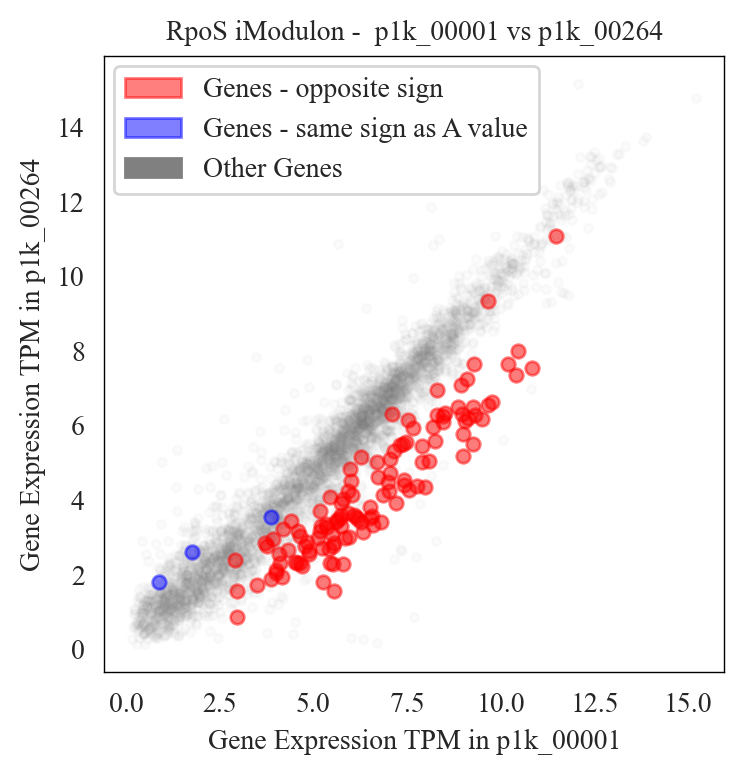

In [39]:
plot_scatter_condition_component_with_geneid(log_tpm_precise_1k, gene_presence_matrix_precise_1k, iM_table_precise_1k, M_precise_1k, A_precise_1k, 'RpoS', 'p1k_00264')

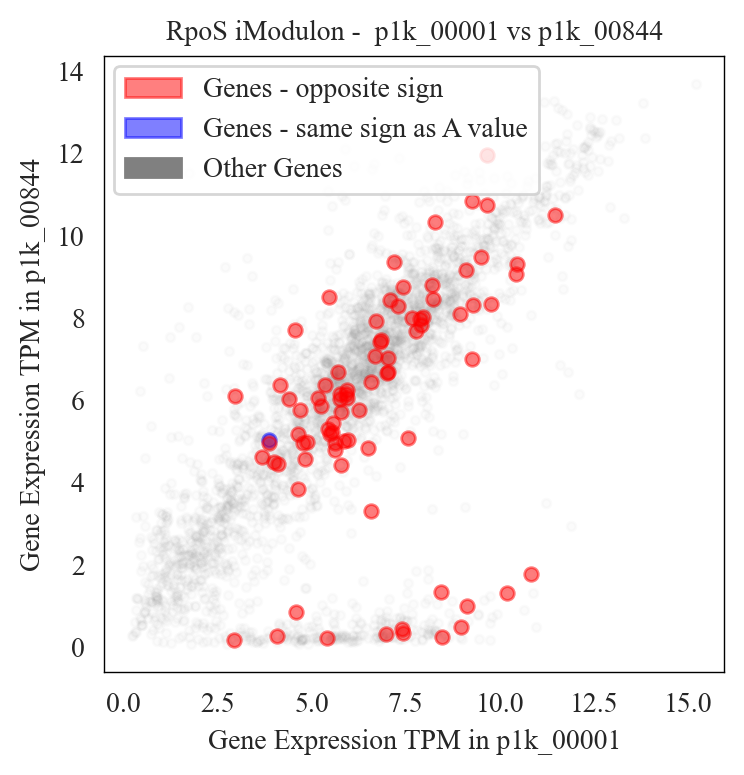

In [40]:
plot_scatter_condition_component_with_geneid(log_tpm_precise_1k, gene_presence_matrix_precise_1k, iM_table_precise_1k, M_precise_1k, A_precise_1k, 'RpoS', 'p1k_00844')

In [35]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from adjustText import adjust_text
import matplotlib.font_manager as fm

def plot_scatter_condition_component_with_geneid(df, gene_presence_df, iM_table_df, M_matrix, A_matrix, component, condition2):
    
    condition1 = 'p1k_00001'
    
    # Create the subfolder if it doesn't exist
    directory = f"./A_confidence"
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Prepare x and y
    x = df.loc[gene_presence_df.index, condition1]
    y = df.loc[gene_presence_df.index, condition2]

    # Create a mask for non-zero values
    mask = (x != 0) & (y != 0)

    # Apply the mask
    x = x[mask]
    y = y[mask]

    A_value = A_matrix.loc[component, condition2]
    
    # Define colors and also store coordinates of red and blue points for calculating centroid
    x_red = []
    y_red = []
    x_blue = []
    y_blue = []
    genes_red = []
    genes_blue = []
    for gene in x.index:
        if gene_presence_df.loc[gene, component]:
            M_value = M_matrix.loc[gene, component]
            if np.sign(M_value) == np.sign(A_value):
                x_blue.append(x[gene])
                y_blue.append(y[gene])
                genes_blue.append(gene)
            else:
                x_red.append(x[gene])
                y_red.append(y[gene])
                genes_red.append(gene)

    # Set font properties
    font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
    font_prop = fm.FontProperties(fname=font_path)

    # Create the scatter plot
    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, c='grey', alpha=0.03, s=10)
    plt.scatter(x_blue, y_blue, c='blue', alpha=0.5, s=24)
    plt.scatter(x_red, y_red, c='red', alpha=0.5, s=24)

    # Get component name from iM_table_df
    component_name = iM_table_df[iM_table_df['k'] == component]['name'].values[0]
    
    # Add annotations for each point
    texts = []
    for i, gene in enumerate(genes_red):
        texts.append(plt.text(x_red[i], y_red[i], gene, ha='center', va='center', color='red', alpha=0.5, size=8, fontproperties=font_prop))
    for i, gene in enumerate(genes_blue):
        texts.append(plt.text(x_blue[i], y_blue[i], gene, ha='center', va='center', color='blue', alpha=0.5, size=8, fontproperties=font_prop))

    adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(3,3), expand_text=(2,2), 
                arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

    # Create legend with specific color and labels
    red_patch = mpatches.Patch(color='red', alpha=0.5, label="Genes - opposite sign") # Genes in component with opposite sign to A value
    blue_patch = mpatches.Patch(color='blue', alpha=0.5, label="Genes - same sign as A value") # Genes in component with same sign as A value
    grey_patch = mpatches.Patch(color='grey', label="Other Genes")
    plt.legend(handles=[red_patch, blue_patch, grey_patch], loc='upper left', borderaxespad=0.35, prop=font_prop)

    plt.title(f'{component_name} iModulon -  {condition1} vs {condition2}', fontproperties=font_prop)
    plt.xlabel(f'Gene Expression TPM in {condition1}', fontproperties=font_prop)
    plt.ylabel(f'Gene Expression TPM in {condition2}', fontproperties=font_prop)

    # Set font properties for ticks
    plt.xticks(fontproperties=font_prop)
    plt.yticks(fontproperties=font_prop)

    # Remove the grid and add a black border
    plt.grid(False)
    plt.gca().spines['top'].set_linewidth(0.5)
    plt.gca().spines['bottom'].set_linewidth(0.5)
    plt.gca().spines['left'].set_linewidth(0.5)
    plt.gca().spines['right'].set_linewidth(0.5)
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['right'].set_color('black')
    
    # plt.savefig(f"{directory}/updated_plot_{component}_{condition2}.svg")

    plt.show()


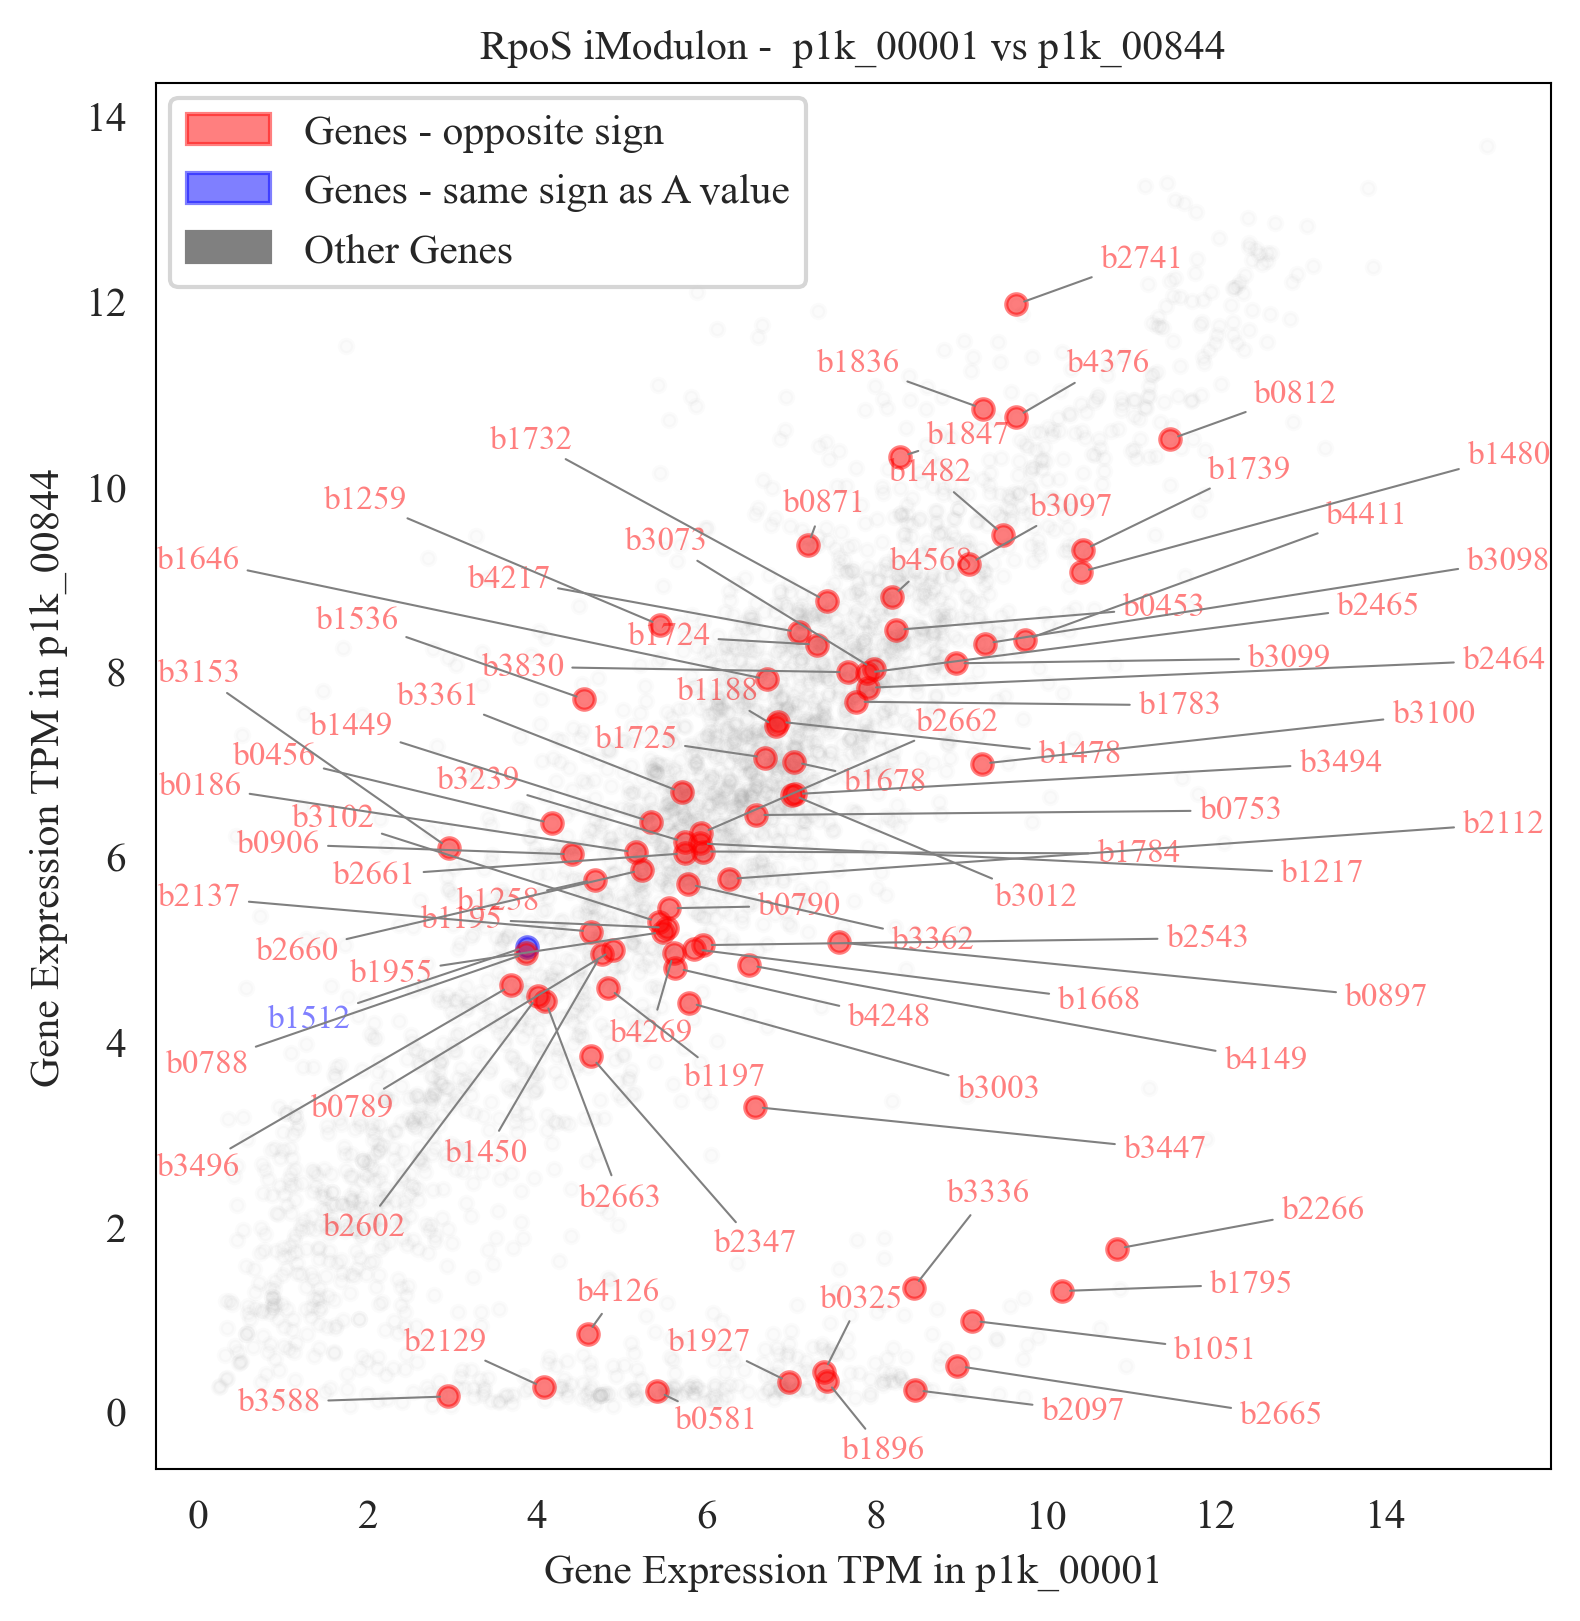

In [36]:
plot_scatter_condition_component_with_geneid(log_tpm_precise_1k, gene_presence_matrix_precise_1k, iM_table_precise_1k, M_precise_1k, A_precise_1k, 'RpoS', 'p1k_00844')

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from adjustText import adjust_text
import matplotlib.font_manager as fm

def plot_scatter_condition_component_with_geneid(df, gene_presence_df, iM_table_df, M_matrix, A_matrix, component, condition2):
    
    condition1 = 'p1k_00001'
    
    # Create the subfolder if it doesn't exist
    directory = f"./A_confidence"
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Prepare x and y
    x = df.loc[gene_presence_df.index, condition1]
    y = df.loc[gene_presence_df.index, condition2]

    # Create a mask for non-zero values
    mask = (x != 0) & (y != 0)

    # Apply the mask
    x = x[mask]
    y = y[mask]

    A_value = A_matrix.loc[component, condition2]
    
    # Define colors and store coordinates of red points for calculating centroid
    x_red = []
    y_red = []
    genes_red = []
    for gene in x.index:
        if gene_presence_df.loc[gene, component]:
            M_value = M_matrix.loc[gene, component]
            if np.sign(M_value) != np.sign(A_value):
                x_red.append(x[gene])
                y_red.append(y[gene])
                genes_red.append(gene)

    # Set font properties
    font_path = '/usr/share/fonts/truetype/msttcorefonts/Arial.ttf'
    font_prop = fm.FontProperties(fname=font_path)

    # Create the scatter plot
    plt.figure(figsize=(2.7, 2.7))
    plt.scatter(x, y, c='grey', alpha=0.03, s=10)
    plt.scatter(x_red, y_red, c='red', alpha=0.5, s=24)

    # Get component name from iM_table_df
    component_name = iM_table_df[iM_table_df['k'] == component]['name'].values[0]

    # Create legend with specific color and labels
    red_patch = mpatches.Patch(color='red', alpha=0.5, label=f"{component} iM Genes")  # Updated legend label to "Genes"
    grey_patch = mpatches.Patch(color='grey', label="Other Genes")
    plt.legend(handles=[red_patch, grey_patch], loc='upper left', borderaxespad=0.35, prop=font_prop)

    plt.title(f'{component_name} iModulon Activation on {condition2}', fontproperties=font_prop)
    plt.xlabel(f'Gene Expression in {condition1}', fontproperties=font_prop)
    plt.ylabel(f'Gene Expression in {condition2}', fontproperties=font_prop)

    # Set font properties for ticks
    plt.xticks(fontproperties=font_prop)
    plt.yticks(fontproperties=font_prop)

    # Remove the grid and add a black border
    plt.grid(False)
    plt.gca().spines['top'].set_linewidth(0.5)
    plt.gca().spines['bottom'].set_linewidth(0.5)
    plt.gca().spines['left'].set_linewidth(0.5)
    plt.gca().spines['right'].set_linewidth(0.5)
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['right'].set_color('black')
    
    plt.savefig(f"{directory}/updated_plot_{component}_{condition2}.svg")

    plt.show()


In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from adjustText import adjust_text
import matplotlib.font_manager as fm
import matplotlib.ticker as mticker

def plot_scatter_condition_component_with_geneid(df, gene_presence_df, iM_table_df, M_matrix, A_matrix, component, condition2):
    
    condition1 = 'p1k_00001'
    
    directory = f"./A_confidence"
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    x = df.loc[gene_presence_df.index, condition1]
    y = df.loc[gene_presence_df.index, condition2]

    mask = (x != 0) & (y != 0)
    x = x[mask]
    y = y[mask]

    A_value = A_matrix.loc[component, condition2]
    
    x_red = []
    y_red = []
    genes_red = []
    for gene in x.index:
        if gene_presence_df.loc[gene, component]:
            M_value = M_matrix.loc[gene, component]
            if np.sign(M_value) != np.sign(A_value):
                x_red.append(x[gene])
                y_red.append(y[gene])
                genes_red.append(gene)

    font_path = '/usr/share/fonts/truetype/msttcorefonts/Arial.ttf'
    font_prop = fm.FontProperties(fname=font_path)

    fig, ax = plt.subplots(figsize=(2.7, 2.7))
    ax.scatter(x, y, c='grey', alpha=0.03, s=10)
    ax.scatter(x_red, y_red, c='red', alpha=0.5, s=24)

    component_name = iM_table_df[iM_table_df['k'] == component]['name'].values[0]

    red_patch = mpatches.Patch(color='red', alpha=0.5, label=f"{component} iM Genes")
    grey_patch = mpatches.Patch(color='grey', label="Other Genes")
    ax.legend(handles=[red_patch, grey_patch], loc='upper left', borderaxespad=0.35, prop=font_prop)

    ax.set_title(f'{component_name} iModulon Activation on {condition2}', fontproperties=font_prop)
    ax.set_xlabel(f'Gene Expression in {condition1}', fontproperties=font_prop)
    ax.set_ylabel(f'Gene Expression in {condition2}', fontproperties=font_prop)

    # ax.set_xticklabels(ax.get_xticks(), fontproperties=font_prop)
    # ax.set_yticklabels(ax.get_yticks(), fontproperties=font_prop)
    for label in ax.get_xticklabels():
        label.set_fontproperties(font_prop)
    
    for label in ax.get_yticklabels():
        label.set_fontproperties(font_prop)

    # === KEY PART: identical range + identical ticks ===
    all_vals = np.concatenate([x.values, y.values])
    vmin = np.min(all_vals)
    vmax = np.max(all_vals)

    pad = 0.05 * (vmax - vmin)
    vmin -= pad
    vmax += pad

    ax.set_xlim(vmin, vmax)
    ax.set_ylim(vmin, vmax)

    ax.set_aspect('equal', adjustable='box')

    tick_locator = mticker.MaxNLocator(nbins=5)
    ax.xaxis.set_major_locator(tick_locator)
    ax.yaxis.set_major_locator(tick_locator)
    # ===================================================

    ax.grid(False)
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)
        spine.set_color('black')
    
    plt.savefig(f"{directory}/updated_plot_{component}_{condition2}.svg")
    plt.show()


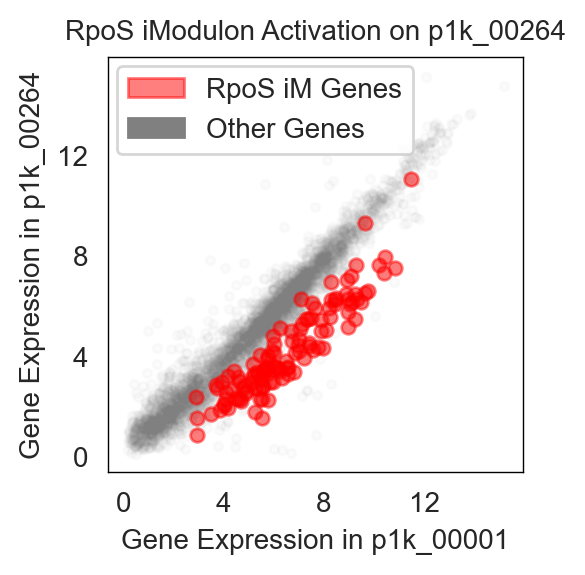

In [18]:
plot_scatter_condition_component_with_geneid(log_tpm_precise_1k, gene_presence_matrix_precise_1k, iM_table_precise_1k, M_precise_1k, A_precise_1k, 'RpoS', 'p1k_00264')

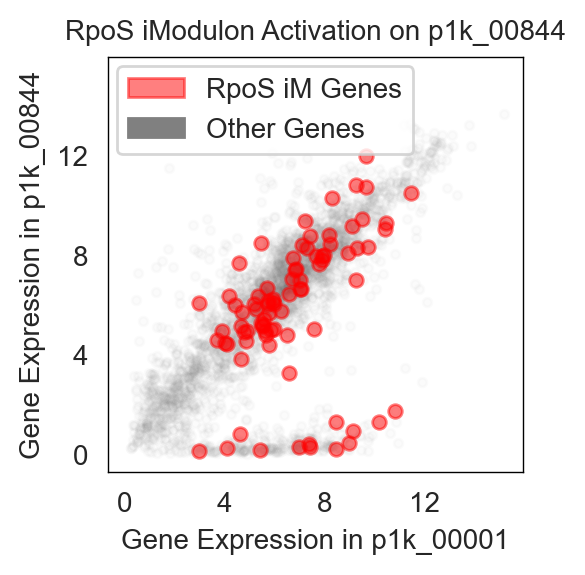

In [19]:
plot_scatter_condition_component_with_geneid(log_tpm_precise_1k, gene_presence_matrix_precise_1k, iM_table_precise_1k, M_precise_1k, A_precise_1k, 'RpoS', 'p1k_00844')

In [69]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from adjustText import adjust_text
import matplotlib.font_manager as fm

def plot_scatter_condition_component_with_geneid(df, gene_presence_df, iM_table_df, M_matrix, A_matrix, component, condition2):
    
    condition1 = 'p1k_00001'
    
    # Create the subfolder if it doesn't exist
    directory = f"./A_confidence"
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Prepare x and y
    x = df.loc[gene_presence_df.index, condition1]
    y = df.loc[gene_presence_df.index, condition2]

    # Create a mask for non-zero values
    mask = (x != 0) & (y != 0)

    # Apply the mask
    x = x[mask]
    y = y[mask]

    A_value = A_matrix.loc[component, condition2]
    
    # Define colors and store coordinates of red points for calculating centroid
    x_red = []
    y_red = []
    genes_red = []
    for gene in x.index:
        if gene_presence_df.loc[gene, component]:
            M_value = M_matrix.loc[gene, component]
            if np.sign(M_value) != np.sign(A_value):
                x_red.append(x[gene])
                y_red.append(y[gene])
                genes_red.append(gene)

    # Set font properties
    font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
    font_prop = fm.FontProperties(fname=font_path)

    # Create the scatter plot
    plt.figure(figsize=(2.7, 2.7))
    plt.scatter(x, y, c='grey', alpha=0.03, s=10)
    plt.scatter(x_red, y_red, c='red', alpha=0.5, s=24)

    # Get component name from iM_table_df
    component_name = iM_table_df[iM_table_df['k'] == component]['name'].values[0]

    # Create legend with specific color and labels
    red_patch = mpatches.Patch(color='red', alpha=0.5, label=f"{component} iM Genes")  # Updated legend label to "Genes"
    grey_patch = mpatches.Patch(color='grey', label="Other Genes")
    plt.legend(handles=[red_patch, grey_patch], loc='upper left', borderaxespad=0.35, prop=font_prop)

    plt.title(f'{component_name} iModulon\nActivation on {condition2}', fontproperties=font_prop)
    plt.xlabel(f'Gene Expression in {condition1}', fontproperties=font_prop)
    plt.ylabel(f'Gene Expression in {condition2}', fontproperties=font_prop)

    # Set font properties for ticks
    plt.xticks(fontproperties=font_prop)
    plt.yticks(fontproperties=font_prop)

    # Remove the grid and add a black border
    plt.grid(False)
    plt.gca().spines['top'].set_linewidth(0.5)
    plt.gca().spines['bottom'].set_linewidth(0.5)
    plt.gca().spines['left'].set_linewidth(0.5)
    plt.gca().spines['right'].set_linewidth(0.5)
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['right'].set_color('black')
    
    plt.savefig(f"{directory}/updated_plot_{component}_{condition2}.svg")

    plt.show()


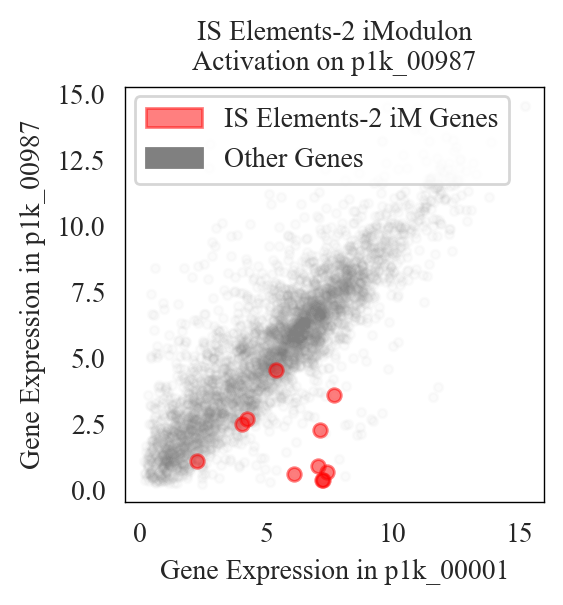

In [70]:
plot_scatter_condition_component_with_geneid(log_tpm_precise_1k, gene_presence_matrix_precise_1k, iM_table_precise_1k, M_precise_1k, A_precise_1k, 'IS Elements-2', 'p1k_00987')

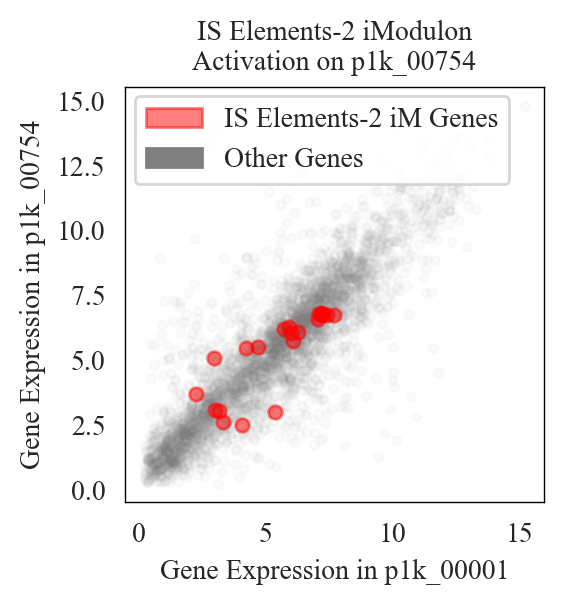

In [71]:
plot_scatter_condition_component_with_geneid(log_tpm_precise_1k, gene_presence_matrix_precise_1k, iM_table_precise_1k, M_precise_1k, A_precise_1k, 'IS Elements-2', 'p1k_00754')